In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

In [6]:
len(y_train)

60000

In [10]:
x_train[0].shape 
#28 by 28 matrix(2d arr)

(28, 28)

In [11]:
x_train[0] 
#print the matrix for 1st training data

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

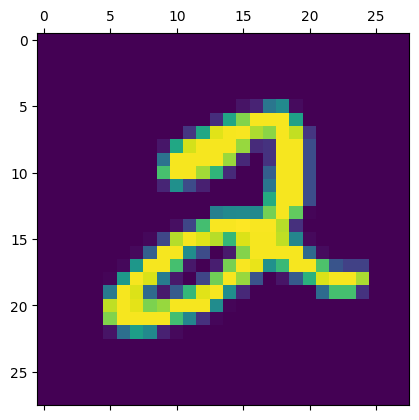

In [14]:
plt.matshow(x_train[5])   
#plotting the 5th data using matpotlib

In [15]:
y_train[5]      
# y means output, train means output while training of given x

2

In [18]:
y_train[:10]   
#y train contains outputs, means the digits(0-9), [:10] means first 10 outputs

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [19]:
# we need to flatten the 2d array to 1d array to load input in neural network

In [20]:
x_train.shape 
# 60000 total data points, 28 and 28 is 2d array, means 60000 2d arrays of size 28 by 28

(60000, 28, 28)

In [49]:
x_train = x_train/255
x_test = x_test/255   

#Scaling the numbers to improve the model accuracy

In [50]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)  
# it will do something like: 60000,784

x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [51]:
x_train_flattened.shape

(60000, 784)

In [52]:
x_test_flattened.shape

(10000, 784)

In [53]:
x_train_flattened[0]   #converted to 1d array

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [36]:
#Now we are going to create a simple neural network with 2 layers, input layers containing 784 neurons and output layer containing 10 neurons(0-9)

In [54]:
#sequential means i'm having a stack of layers in my NN
#10 means 10 neurons in output; input is 784 neurons i.e. saying input_shape(784
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8103 - loss: 0.7309
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9135 - loss: 0.3120
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9196 - loss: 0.2808
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9251 - loss: 0.2713
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9272 - loss: 0.2634


In [55]:
model.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9142 - loss: 0.3044


[0.2672954201698303, 0.925000011920929]

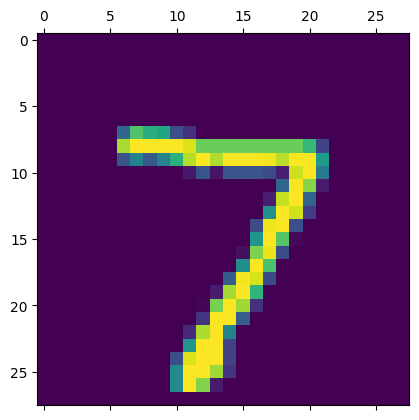

In [65]:
plt.matshow(x_test[0])

In [66]:
y_predicted = model.predict(x_test_flattened)   
#output for all the test data and store in an array

y_predicted[0]   
#the 1st output, should be 7, as we seen above the given input is 7

#y_predicted are whole values
# and y_test are integer values

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([2.93221585e-02, 3.48767458e-07, 1.08635597e-01, 9.63061035e-01,
       2.24904832e-03, 1.27892286e-01, 1.35994082e-06, 9.99845862e-01,
       1.09716944e-01, 7.03210354e-01], dtype=float32)

In [67]:
np.argmax(y_predicted[0])   #numpy function will give the index of the max value in the array

7

In [73]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]   
#get the array containng predicted values for all inputs
#len(y_predicted_labels)    #: 10000

y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [74]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [69]:
# to see how your prediction looked like, we use confusion matrix
#in tf there is a module called math, which has confusion matrix function, and give it labels

In [76]:
conf_matrix = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
conf_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    2,    2,    0,    5,    3,    2,    1,    0],
       [   0, 1110,    4,    2,    0,    1,    3,    2,   13,    0],
       [   4,    6,  947,   13,    6,    3,    9,   10,   29,    5],
       [   4,    0,   27,  914,    0,   23,    1,   12,   20,    9],
       [   2,    1,   10,    2,  891,    0,    6,    5,   11,   54],
       [  10,    2,   11,   31,    6,  777,    8,    7,   32,    8],
       [  16,    3,   16,    1,    7,   12,  898,    2,    3,    0],
       [   1,    5,   23,    6,    3,    0,    0,  953,    2,   35],
       [   7,    7,    8,   22,    9,   22,    7,   13,  869,   10],
       [  11,    7,    1,   10,   15,    7,    0,   27,    5,  926]])>

In [77]:
# visualize confusion matrix in a visually appealing way
# using seaborn library

Text(95.72222222222221, 0.5, 'actual')

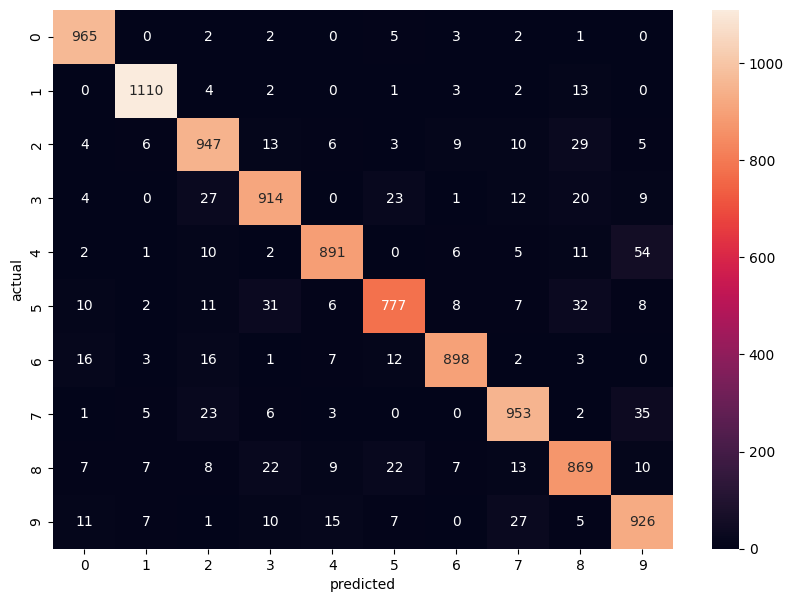

In [81]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('actual')
#just a fancy representation

#what it signify is:
#965 times the input was 0 and predicted output was also 0: 0's prediction was correct 965 times
#1110 times the input was 1 and predicted output was also 1

#every number other than at Diagonal is error, actual vs predicted

In [89]:
#Now same model with one added Hidden Layer, Hidden layers tends to improve the performance of the model

model = keras.Sequential([
    #for selecting the number of neurons in hidden layer, try hit and trial method, as there is no thumb rule to do so
    keras.layers.Dense(100, input_shape=(784,),activation = 'relu'),   #we need to specify input shape, bcz we are creatinig it at first layer
    keras.layers.Dense(10, activation = 'sigmoid')      #for the hidden layer, no need to specify the input shape, bcz it automatically does it, and we need 10 outputs
])

model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 965us/step - accuracy: 0.8651 - loss: 0.4603
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 939us/step - accuracy: 0.9618 - loss: 0.1302
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 924us/step - accuracy: 0.9733 - loss: 0.0908
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 924us/step - accuracy: 0.9807 - loss: 0.0635
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 930us/step - accuracy: 0.9851 - loss: 0.0506


In [92]:
model.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - accuracy: 0.9697 - loss: 0.0939


[0.08333121240139008, 0.9742000102996826]

In [ ]:
#again draw the confusion matrix for new model with hidden layer

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step


Text(95.72222222222221, 0.5, 'actual')

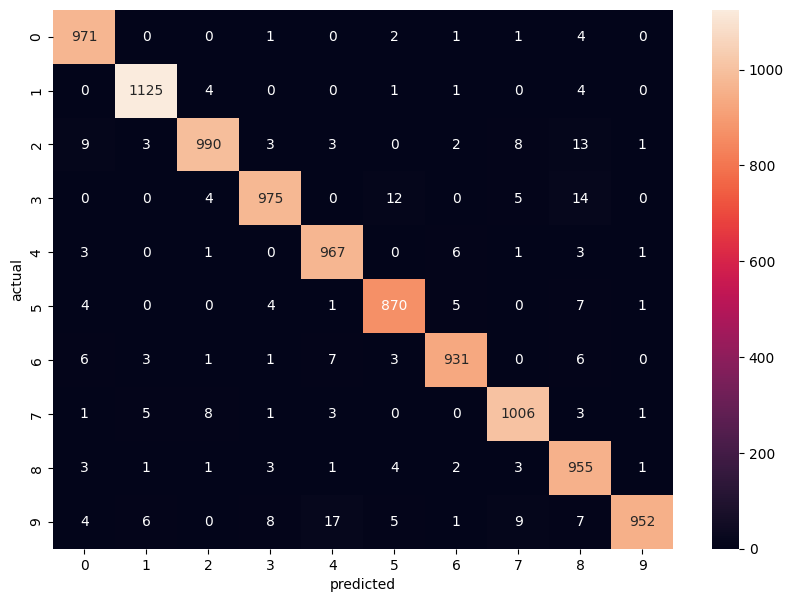

In [93]:
y_predicted = model.predict(x_test_flattened) 
y_predicted_labels = [np.argmax(i) for i in y_predicted]
conf_matrix = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('actual')

In [137]:
model = keras.Sequential([
    #using keras inbuilt function flatten, to avoid manually flattening the test data, train data
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(300, activation = 'relu'),   
    #we need to specify input shape, bcz we are creatinig it at first layer

    keras.layers.Dense(300, activation = 'relu'),
    
    keras.layers.Dense(10, activation = 'sigmoid')      
    #for the hidden layer, no need to specify the input shape, bcz it automatically does it, and we need 10 outputs
])

model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train, y_train, epochs = 7)

Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8984 - loss: 0.3375
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9753 - loss: 0.0798
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9816 - loss: 0.0567
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9866 - loss: 0.0417
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9906 - loss: 0.0298
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9908 - loss: 0.0269
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9926 - loss: 0.0223
